# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- 1: Entendimento do Desafio
- 2: Entendimento da Área/Empresa
- 3: Extração/Obtenção de Dados
- 4: Ajuste de Dados (Tratamento/Limpeza)
- 5: Análise Exploratória
- 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- 7: Interpretação de Resultados

#### PASSO 1 - Entendimento do Desafio e da  Área/Empresa 

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em *milhares* de reais - por isso que o número dos investimentos são maiores que os das vendas
- Vendas estão em *milhões*

#### PASSO 2 - Extração/Obtenção de Dados

In [1]:
# importar bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# importar dados

tabela= pd.read_csv("advertising.csv")
display(tabela)


,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### PASSO 3 -  Ajuste de Dados (Tratamento/Limpeza)

In [2]:
# verificar se a tabela precisa de tratamento de dados(data cleaning)

print(tabela.info())

# nesse caso, não precisa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


#### PASSO 4 - Análise Exploratória
- Visualizar como as informações de cada item estão distribuídas
- Verificar a correlação entre cada um dos itens

In [3]:
# calcular a correlação

print(tabela.corr())


              TV     Radio    Jornal    Vendas
TV      1.000000  0.054809  0.056648  0.901208
Radio   0.054809  1.000000  0.354104  0.349631
Jornal  0.056648  0.354104  1.000000  0.157960
Vendas  0.901208  0.349631  0.157960  1.000000


<AxesSubplot:>

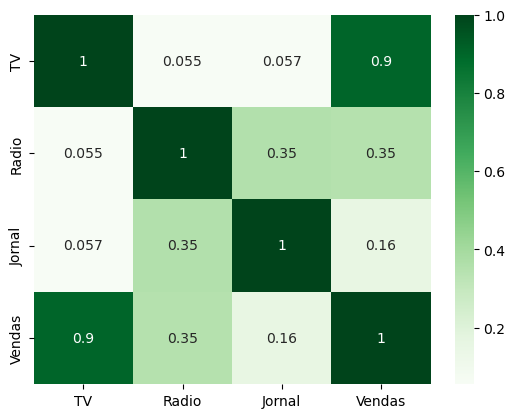

In [4]:
# criar um gráfico

sns.heatmap(tabela.corr(), cmap ="Greens", annot=True)

# a TV vai impactar mais nas vendas porque está com correlação 0.9

#### PASSO 5 - Modelagem + Algoritmos

- Separando em dados de treino e dados de teste

#### Treinamento do Modelo de Machine Learning

In [5]:
# treinar IA

y = tabela["Vendas"] 

x = tabela[["TV", "Radio", "Jornal"]]

In [6]:
# treinar os modelos de Regressão e Árvore de Decisão

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y , test_size=0.3, random_state=1)


#### Escolher modelos que a serem utiliados:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [7]:
# importar a inteligência artificial

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# criar a IA

modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treinar a IA
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

# fit - treinar

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [8]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste) 
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

#predict - previsão

from sklearn.metrics import r2_score

# qual é o r2 se quiser comparar o y_teste com a previsão_regressãolinear - 0.90 - 90%
print(r2_score(y_teste, previsao_regressaolinear))

# o modelo da previsao da árvore de decisão é o melhor por ter uma maior porcentagem - 96%
print(r2_score(y_teste, previsao_arvoredecisao))  

0.9071151423684273
0.9621422518895043


#### PASSO 7 - Interpretação dos Resultados - Visualização Gráfica das Previsões

In [9]:
tabela_auxiliar = pd.DataFrame()

# criar colunas

tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsão Árvore Decisão"] = previsao_arvoredecisao
tabela_auxiliar["Previsão Regressão Linear"] = previsao_regressaolinear

display(tabela_auxiliar.head())

,y_teste,Previsão Árvore Decisão,Previsão Regressão Linear
58,23.8,23.137,21.288161
40,16.6,17.980,18.042132
34,11.9,13.074,10.059590
102,19.8,18.021,21.082241
184,17.6,20.347,20.764760


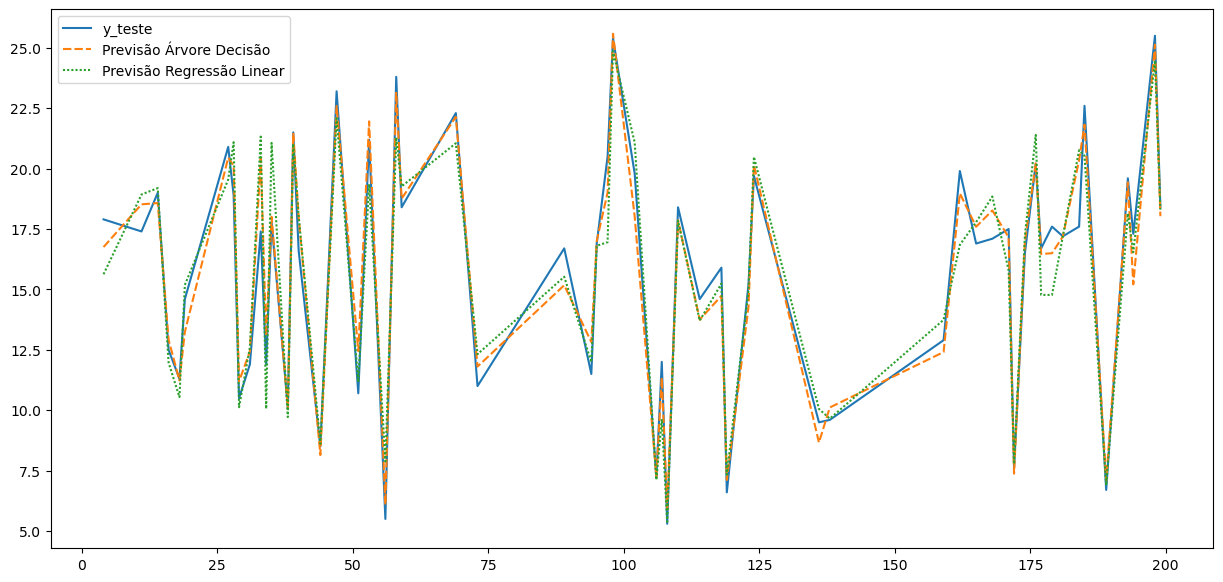

In [10]:
# exibir gráfico

plt.figure(figsize=(15,7))
sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Como fazer uma nova previsão?

In [11]:
# importar tabela

nova_tabela = pd.read_csv("novos.csv")

display(nova_tabela)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [12]:
# realizar uma nova previsão com o modelo que mais chegou perto do y_vendas
# modelo randomforest

previsao = modelo_arvoredecisao.predict(nova_tabela)
print(previsao)

[ 7.693  8.995 20.096]


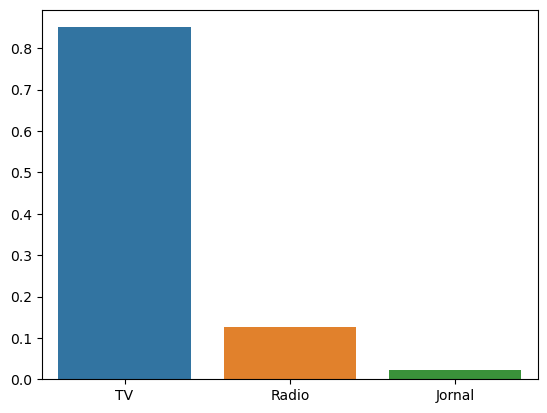

In [13]:
# importância de cada variável nas vendas(TV, Radio e Jornal)

sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()

**Conclusão:**

- Conclui-se que o modelo de árvore de decisão foi o que chegou mais próximo ao y_teste com o valor de 96%.
- Ao realizar uma nova previsão com esse modelo, nota-se que:
  - Quanto maior for o investimento em progagandas na TV, maior será as vendas.
  
- Conforme mostra o gráfico de barras, a TV tem maior impacto nas vendas. Por isso, deve-se realizar um maior investimento em TV para ter um maior número de vendas.